This notebook describes the implementation of the following paper:

##### Modeling mesoscopic cortical dynamics using a mean-field model of conductance-based networks of adaptive exponential integrate-and-fire neurons

Yann Zerlaut, Sandrine Chemla, Frederic Chavane and Alain Destexhe

paper's link: https://link.springer.com/article/10.1007%2Fs10827-017-0668-2

If you use this code, please cite:
#### Zerlaut et al. *J Comput Neurosci* (2017). https://doi.org/10.1007/s10827-017-0668-2


# Abstract

Voltage-sensitive dye imaging (VSDi) has revealed fundamental properties of neocortical processing at macroscopic scales. Since for each pixel VSDi signals report the average membrane potential over hundreds of neurons, it seems natural to use a mean-field formalism to model such signals. Here, we present a mean-field model of networks of Adaptive Exponential (AdEx) integrate-and-fire neurons, with conductance-based synaptic interactions. We study a network of regular-spiking (RS) excitatory neurons and fast-spiking (FS) inhibitory neurons. We use a Master Equation formalism, together with a semi-analytic approach to the transfer function of AdEx neurons to describe the average dynamics of the coupled populations. We compare the predictions of this mean-field model to simulated networks of RS-FS cells, first at the level of the spontaneous activity of the network, which is well predicted by the analytical description. Second, we investigate the response of the network to time-varying external input, and show that the mean-field model predicts the response time course of the population. Finally, to model VSDi signals, we consider a one-dimensional ring model made of interconnected RS-FS mean-field units. We found that this model can reproduce the spatio-temporal patterns seen in VSDi of awake monkey visual cortex as a response to local and transient visual stimuli. Conversely, we show that the model allows one to infer physiological parameters from the experimentally-recorded spatio-temporal patterns.

## DEPENDENCIES : numpy, matplotlib, scipy and Brian2 

You'll need a full features Scientific Python distribution
you can get one at :
https://www.continuum.io/downloads

get Brian2 for numerical simulations of network dynamics
http://brian2.readthedocs.io/en/stable/#
you can now get it through "conda" with:
conda install -c brian-team brian2

In [4]:
print('-------> Tested under the following settings:')
import scipy
print('SciPy version :', scipy.__version__)
import numpy
print('NumPy version :', numpy.__version__)
import matplotlib
print('Matplotlib version :', matplotlib.__version__)
import brian2
print('Brian2 version :', brian2.__version__)

-------> Tested under the following settings:
SciPy version : 0.18.1
NumPy version : 1.12.1
Matplotlib version : 2.0.0
Brian2 version : 2.0.1


In [7]:
# displaying figures inline:
%matplotlib inline 

### Transfer Functions of Single Cell Models (within a given network setting)

Here, we build up the description of the single cell computation within the mean-field formalism

#### Excitatory cells: RS cells

In [8]:
# the parameters are written within a library of neuron parameters
from modeling_mesoscopic_dynamics.single_cell_models.cell_library import get_neuron_params
RS_params = get_neuron_params('RS-cell', name='RS-cell', SI_units=False)
print(RS_params)

cell parameters --NOT-- in SI units
{'Trefrac': 5.0, 'Vthre': -50.0, 'El': -65.0, 'Cm': 200.0, 'delta_v': 2.0, 'tauw': 500.0, 'Vreset': -65.0, 'N': 1, 'b': 20.0, 'Gl': 10.0, 'name': 'RS-cell', 'a': 4.0}


cell parameters in SI units


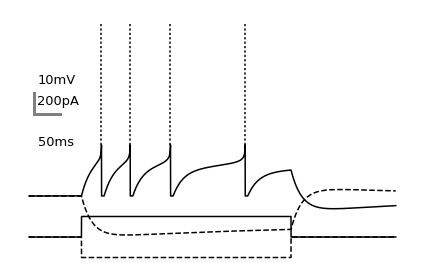

In [9]:
# plotting the responses to current steps
from modeling_mesoscopic_dynamics.single_cell_models.step_response import make_model_figure
make_model_figure('RS-cell', I0=200e-12);

In [40]:
# Now making the numerical simulations at various levels of both excitatory and inhibitory inputs
# note the rescaling of the excitatory input to insure that the response remains in the <30 range: it focuses on low range when inhibition is low and on a larger range when inhibition is larger
%run  modeling_mesoscopic_dynamics/transfer_functions/tf_simulation.py RS-cell CONFIG1 -s --SEED 4 --tstop 10 --discret_Fe 10  --discret_Fi 10 --max_Fe 30
# paper's value -> 5-10 minutes sim

cell parameters in SI units
synaptic network parameters in SI units
numerical TF data saved in : data/RS-cell_CONFIG1.npy


In [41]:
from modeling_mesoscopic_dynamics.transfer_functions.theoretical_tools import make_fit_from_data
P_RS = make_fit_from_data('data/RS-cell_CONFIG1.npy', with_square_terms=True, verbose=False)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.33631085882e-08
            Iterations: 9
            Function evaluations: 120
            Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.041754
         Iterations: 1087
         Function evaluations: 1541
[-54.7150805    7.64453782  -4.62722888   1.71283147  -0.10710902
   0.72054481  -2.00463685   0.11756368   5.61325855  -0.99436164
  -2.87604362] mV
coefficients saved in  data/RS-cell_CONFIG1_fit.npy


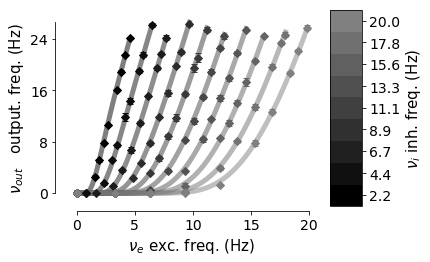

In [42]:
# now displaying the numerical values and the analytical function
from modeling_mesoscopic_dynamics.transfer_functions.plots import make_exc_inh_fig
make_exc_inh_fig('data/RS-cell_CONFIG1.npy', P=P_RS)

#### Inhibitory cells: FS-cells

In [43]:
# the parameters are written within a library of neuron parameters
from modeling_mesoscopic_dynamics.single_cell_models.cell_library import get_neuron_params
FS_params = get_neuron_params('FS-cell', name='FS-cell', SI_units=False)
print(FS_params)

cell parameters --NOT-- in SI units
{'Trefrac': 5.0, 'Vthre': -50.0, 'El': -65.0, 'Cm': 200.0, 'delta_v': 0.5, 'tauw': 1000000000.0, 'Vreset': -65.0, 'N': 1, 'b': 0.0, 'Gl': 10.0, 'name': 'FS-cell', 'a': 0.0}


cell parameters in SI units


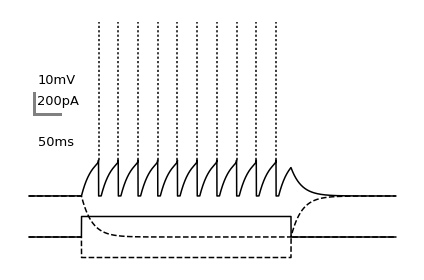

In [44]:
# plotting the responses to current steps
from modeling_mesoscopic_dynamics.single_cell_models.step_response import make_model_figure
make_model_figure('FS-cell', I0=200e-12);

In [48]:
# Now making the numerical simulations at various levels of both excitatory and inhibitory inputs
%run modeling_mesoscopic_dynamics/transfer_functions/tf_simulation.py FS-cell CONFIG1 -s --SEED 4 --tstop 10 --discret_Fe 10  --discret_Fi 10 --max_Fe 30
# paper's value -> 5-10 minutes sim

cell parameters in SI units
synaptic network parameters in SI units
numerical TF data saved in : data/FS-cell_CONFIG1.npy


In [49]:
from modeling_mesoscopic_dynamics.transfer_functions.theoretical_tools import make_fit_from_data
P_FS = make_fit_from_data('data/FS-cell_CONFIG1.npy', with_square_terms=True, verbose=False)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.31599656436e-08
            Iterations: 7
            Function evaluations: 92
            Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.236405
         Iterations: 468
         Function evaluations: 679
[ -5.39174436e+01   4.07642701e+00   1.69747036e+00   9.11869386e-01
  -3.43496494e-02   5.00307136e-01   6.52314112e-02   2.42498031e-02
  -2.34327870e+00  -1.15712989e-01   1.48402587e-01] mV
coefficients saved in  data/FS-cell_CONFIG1_fit.npy


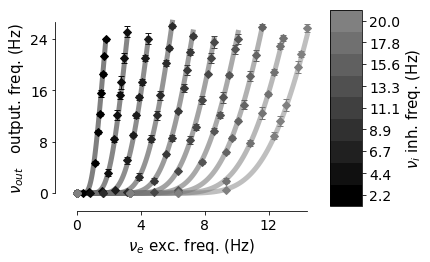

In [50]:
# now displaying the numerical values and the analytical function
from modeling_mesoscopic_dynamics.transfer_functions.plots import make_exc_inh_fig
make_exc_inh_fig('data/FS-cell_CONFIG1.npy', P=P_FS)

In [51]:
# Note that we also used the network parameters because it requires the synaptic properties (number of synapses)
# they are stored in the following module
from modeling_mesoscopic_dynamics.synapses_and_connectivity.syn_and_connec_library import get_connectivity_and_synapses_matrix
print(get_connectivity_and_synapses_matrix('CONFIG1'))

synaptic network parameters --NOT-- in SI units
[[ {'afferent_exc_fraction': 1.0, 'p_conn': 0.05, 'ext_drive': 4.0, 'gei': 0.2, 'Q': 1.0, 'Tsyn': 5.0, 'Ntot': 10000, 'Erev': 0.0, 'name': 'ee'}
  {'Q': 1.0, 'p_conn': 0.05, 'Erev': 0.0, 'Tsyn': 5.0, 'name': 'ei'}]
 [{'Q': 5.0, 'p_conn': 0.05, 'Erev': -80.0, 'Tsyn': 5.0, 'name': 'ie'}
  {'Q': 5.0, 'p_conn': 0.05, 'Erev': -80.0, 'Tsyn': 5.0, 'name': 'ii'}]]


### Network dynamics: numerical simulations vs mean-field

#### Stationary dynamics

performing the numerical simulation with the Brian2 package !
see http://brian2.readthedocs.io/

In [19]:
%run modeling_mesoscopic_dynamics/network_simulations/ntwk_sim_demo.py --CONFIG RS-cell--FS-cell--CONFIG1 -f data/config1.py

synaptic network parameters --NOT-- in SI units
cell parameters --NOT-- in SI units

        dV/dt = (10.000000*nS*(-65.000000*mV - V) + 10.000000*nS*2.000000*mV*exp(-(-50.000000*mV-V)/(2.000000*mV)) + I - w_adapt)/(200.000000*pF) : volt (unless refractory) 
        dw_adapt/dt = ( -4.000000*nS*( -65.000000*mV - V) - w_adapt )/(500.000000*ms) : amp  
        I = I0 +Gee*(0.000000*mV - V)+Gie*(-80.000000*mV - V) : amp
        dGee/dt = -Gee*(1./(5.000000*ms)) : siemens
        dGie/dt = -Gie*(1./(5.000000*ms)) : siemens
        I0 : amp 
cell parameters --NOT-- in SI units

        dV/dt = (10.000000*nS*(-65.000000*mV - V) + 10.000000*nS*0.500000*mV*exp(-(-50.000000*mV-V)/(0.500000*mV)) + I - w_adapt)/(200.000000*pF) : volt (unless refractory) 
        dw_adapt/dt = ( -0.000000*nS*( -65.000000*mV - V) - w_adapt )/(1000000000.000000*ms) : amp  
        I = I0 +Gei*(0.000000*mV - V)+Gii*(-80.000000*mV - V) : amp
        dGei/dt = -Gei*(1./(5.000000*ms)) : siemens
        dGii/dt = -Gii*(1

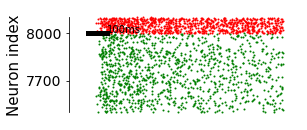

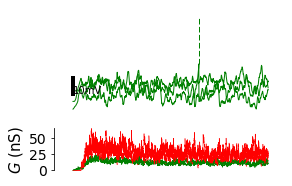

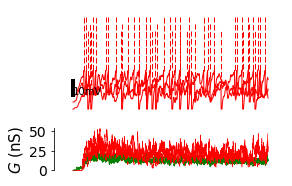

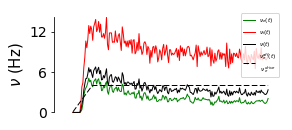

In [5]:
# showing the ouput of the simulations
from modeling_mesoscopic_dynamics.network_simulations.plot_single_sim import plot_ntwk_sim_output
DATA = np.load('data/config1.npy')
AX, FIG = plot_ntwk_sim_output(*DATA,\
                               zoom_conditions=[0,1000], bar_ms=100,\
                               raster_number=500)

cell parameters in SI units
synaptic network parameters in SI units
starting fixed point
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
first order prediction:  [ 2.45719675  9.64063894]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
Make sure that those two values are similar !!
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
first order prediction:  0.252840089744
end fixed point


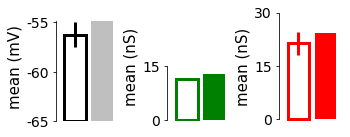

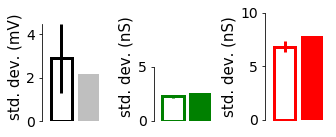

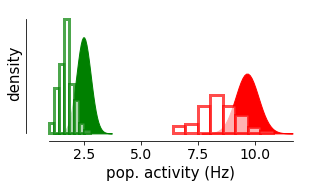

In [6]:
# now comparing the simulation with the mean-field
from modeling_mesoscopic_dynamics.network_simulations.compare_with_mean_field import plot_ntwk_sim_output
FIG = plot_ntwk_sim_output(*DATA, min_time=500) # we discard the initial 500ms to evaluate the dynamics
# the fixed point of the mean field is found by launching a trajectory
# of the mean-field dynamical system and taking the point of convergence
# see modeling_mesoscopic_dynamics/mean_field

#### Time-varying dynamics

In [22]:
# running simulation
%run modeling_mesoscopic_dynamics/network_simulations/waveform_input.py --CONFIG RS-cell--FS-cell--CONFIG1 -f data/waveform.npy --sim

synaptic network parameters --NOT-- in SI units
synaptic network parameters --NOT-- in SI units
cell parameters --NOT-- in SI units

        dV/dt = (10.000000*nS*(-65.000000*mV - V) + 10.000000*nS*2.000000*mV*exp(-(-50.000000*mV-V)/(2.000000*mV)) + I - w_adapt)/(200.000000*pF) : volt (unless refractory) 
        dw_adapt/dt = ( -4.000000*nS*( -65.000000*mV - V) - w_adapt )/(500.000000*ms) : amp  
        I = I0 +Gee*(0.000000*mV - V)+Gie*(-80.000000*mV - V) : amp
        dGee/dt = -Gee*(1./(5.000000*ms)) : siemens
        dGie/dt = -Gie*(1./(5.000000*ms)) : siemens
        I0 : amp 
cell parameters --NOT-- in SI units

        dV/dt = (10.000000*nS*(-65.000000*mV - V) + 10.000000*nS*0.500000*mV*exp(-(-50.000000*mV-V)/(0.500000*mV)) + I - w_adapt)/(200.000000*pF) : volt (unless refractory) 
        dw_adapt/dt = ( -0.000000*nS*( -65.000000*mV - V) - w_adapt )/(1000000000.000000*ms) : amp  
        I = I0 +Gei*(0.000000*mV - V)+Gii*(-80.000000*mV - V) : amp
        dGei/dt = -Gei*(1./(5

synaptic network parameters in SI units
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
first order prediction:  [ 2.45719675  9.64063894]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
Make sure that those two values are similar !!
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
[ 2.45947019  9.66354488  0.09778797  0.11800296  0.25284009]
first order prediction:  0.252840089744
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
cell parameters in SI units
synaptic network parameters in SI units


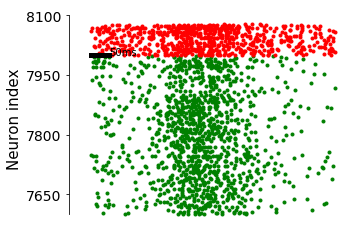

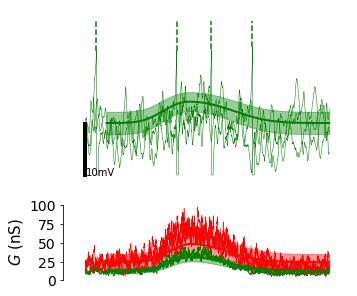

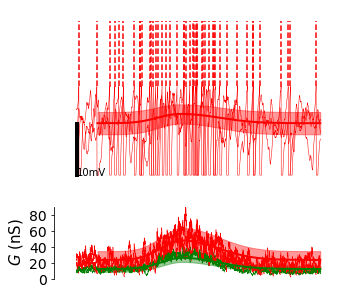

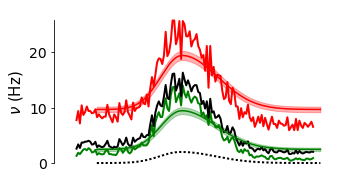

In [7]:
%matplotlib inline
# comparing with the time-varying mean-field
# again the dynamical system is implemented in modeling_mesoscopic_dynamics/mean_field
%run modeling_mesoscopic_dynamics/network_simulations/waveform_input.py --CONFIG RS-cell--FS-cell--CONFIG1 -f data/waveform.npy

## Spatial model

#### baseline configuration

simulation [...]
----- loading parameters [...]
synaptic network parameters in SI units
cell parameters in SI units
----- ## we look for the fixed point [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## we load the transfer functions [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## ring initialisation [...]
----- ## stimulation initialisation [...]
----- ## model initialisation [...]
----- starting the temporal loop [...]
----- temporal loop over !


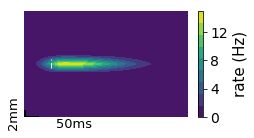

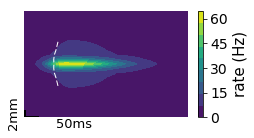

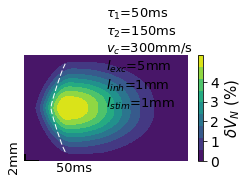

In [8]:
%run modeling_mesoscopic_dynamics/ring_model/single_trial.py

#### Varying parameters

simulation [...]
----- loading parameters [...]
synaptic network parameters in SI units
cell parameters in SI units
----- ## we look for the fixed point [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## we load the transfer functions [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## ring initialisation [...]
----- ## stimulation initialisation [...]
----- ## model initialisation [...]
----- starting the temporal loop [...]
----- temporal loop over !


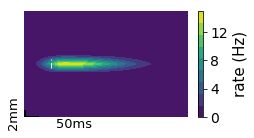

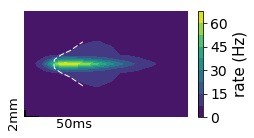

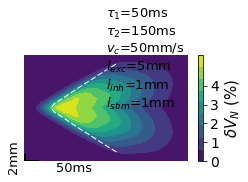

In [9]:
%run modeling_mesoscopic_dynamics/ring_model/single_trial.py --conduction_velocity_mm_s 50

simulation [...]
----- loading parameters [...]
synaptic network parameters in SI units
cell parameters in SI units
----- ## we look for the fixed point [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## we load the transfer functions [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## ring initialisation [...]
----- ## stimulation initialisation [...]
----- ## model initialisation [...]
----- starting the temporal loop [...]
----- temporal loop over !


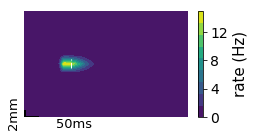

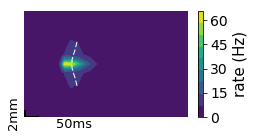

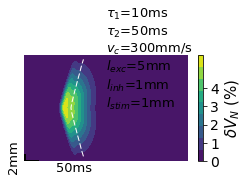

In [10]:
%run modeling_mesoscopic_dynamics/ring_model/single_trial.py --Tau1 10e-3 --Tau2 50e-3

simulation [...]
----- loading parameters [...]
synaptic network parameters in SI units
cell parameters in SI units
----- ## we look for the fixed point [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## we load the transfer functions [...]
synaptic network parameters in SI units
cell parameters in SI units
cell parameters in SI units
----- ## ring initialisation [...]
----- ## stimulation initialisation [...]
----- ## model initialisation [...]
----- starting the temporal loop [...]
----- temporal loop over !


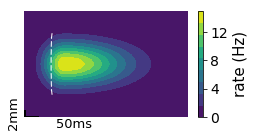

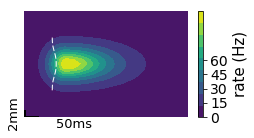

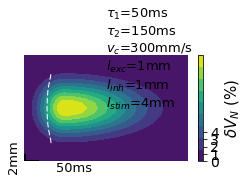

In [11]:
%run modeling_mesoscopic_dynamics/ring_model/single_trial.py --exc_connect_extent 1 --sX 4

## Visually evoked responses recorded through VSDi

see the details of those experimental data in the paper

we illustrate the procedure for one recording stored in "data/VSD_data_session_example.mat"

In [12]:
"""
plotting the VSD data and evidence the propagation
"""
from scipy.io import loadmat
import numpy as np
from graphs.my_graph import set_plot
from scipy.signal import convolve2d
import matplotlib.cm as cm

def load_data(filename, Nsmooth=1, tshift=0):
    f = loadmat(filename)
    data = 1e3*f['matNL'][0]['stim1'][0]
    time = f['matNL'][0]['time'][0].flatten()+tshift
    space = f['matNL'][0]['space'][0].flatten()
    if Nsmooth>0:
        smoothing = np.ones((Nsmooth, Nsmooth))/Nsmooth**2
        smooth_data = convolve2d(data, smoothing, mode='same')
    else:
        smooth_data = data
    return time, space, smooth_data
    
def plot_response(filename,
                  tshift=0, Nsmooth=2,
                  t0=-np.inf,t1=np.inf,
                  Nlevels=10,
                  vsd_ticks=[-0.5, 0, 0.5, 1.]):
    
    fig, ax = plt.subplots(1, figsize=(4.7,3))
    plt.subplots_adjust(bottom=.23, top=.9, right=.84, left=.25)

    time, space, smooth_data = load_data(filename, Nsmooth=Nsmooth, tshift=tshift)
    cond = (time>t0) & (time<t1)
    c = ax.contourf(time[cond], space, smooth_data[:,cond],\
             np.linspace(smooth_data.min(), smooth_data.max(), Nlevels), cmap=cm.viridis)
    plt.colorbar(c, label='VSD signal ($\perthousand$)',
                 ticks=vsd_ticks)

    set_plot(ax, xlabel='time (ms)', ylabel='space (mm)')
    return fig, ax

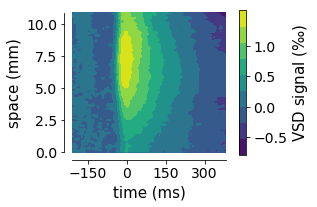

In [13]:
# full response
fig, _ = plot_response('data/VSD_data_session_example.mat')

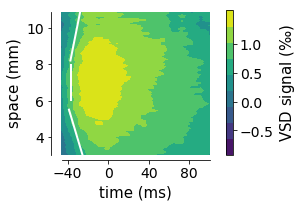

In [14]:
# zoomed response
fig, ax = plot_response('data/VSD_data_session_example.mat',
                        t0=-50, t1=100, Nsmooth=0)
time, space, data = load_data('data/VSD_data_session_example.mat', Nsmooth=0, tshift=0)

"""
amp_criteria is the threshold of the crossing of maximum amplitude
signal_criteria is a minimum amplitude criteria, beyond this level of the maximum observed signal we consider that there is no real evoked reponse, it does not goes beyond noise level
"""
signal_criteria, amp_criteria = 0.4, 0.6
XX, TT = [], []
for i in range(data.T.shape[1]):
    imax = np.argmax(data.T[:,i])
    if data.T[imax,i]>=signal_criteria:
        ii = np.argmin(np.abs(data.T[:imax,i]-amp_criteria*data.T[imax,i]))
        XX.append(space[i])
        TT.append(time[ii])
# ax.plot(np.array(TT), np.array(XX), 'wo', ms=1)        
tt, xx = np.array(TT), np.array(XX)
# for intervals in [[0,2.3], [2.5,5.7], [5.9,8.5]]:
for intervals in [[3, 5.5], [6,8], [8.2, 12]]:
    cond = (xx>intervals[0]) & (xx<intervals[1]) & (tt<20)
    pol = np.polyfit(xx[cond], tt[cond], 1)
    xxx = np.linspace(xx[cond][0], xx[cond][-1])
    plt.plot(np.polyval(pol, xxx), xxx, 'w-', lw=2)
set_plot(ax, xlabel='time (ms)', ylabel='space (mm)', ylim=[3,11])

## Optimizing network parameters

#### N.B. shown for a minimal grid discretization (N=2), turn it to N=5 to have the paper's results (but the simulation takes a few hours)

In [15]:
# we build up the scan run many configurations over a grid
# for testing
%run modeling_mesoscopic_dynamics/ring_model/parameter_scan.py --N 2 
# UNCOMMENT for paper value
# %run modeling_mesoscopic_dynamics/ring_model/parameter_scan.py --N 5

In [32]:
# this writes a bash file in the 'modeling_mesoscopic_dynamics/ring_model' folder
# launch it with "bash modeling_mesoscopic_dynamics/ring_model/bash_parameter_scan.sh"
# (but ideally on a server, this is a bit long ~5h of simulations)
!(ls modeling_mesoscopic_dynamics/ring_model/bash_parameter_scan.sh)

modeling_mesoscopic_dynamics/ring_model/bash_parameter_scan.sh


Residual with this configuration =  18.2543083783


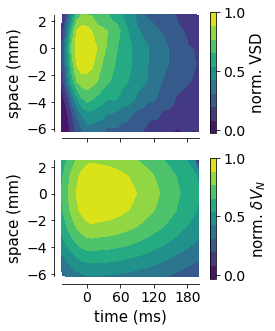

In [16]:
# we align the data and the model to compute a residual:
from modeling_mesoscopic_dynamics.ring_model.compare_to_model import get_data, get_residual
new_time, space, new_data = get_data('data/VSD_data_session_example.mat', t0 = -50, t1=200)
print('Residual with this configuration = ', get_residual(new_time, space, new_data,
                                                          fn='data/example_data.npy',
                                                          with_plot=True))

In [17]:
# then we compute the residual with respect to that datafile for all the scanned configuration
%run modeling_mesoscopic_dynamics/ring_model/parameter_scan.py --analyze

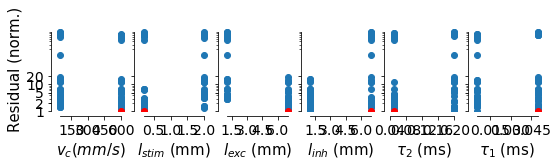

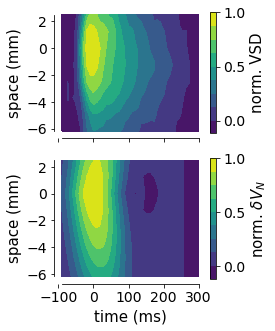

In [18]:
# and we just take the minimum among all configurations, here the red point
# (note that here it is only for N=2, run N=5 to have it identical to the paper)
%run modeling_mesoscopic_dynamics/ring_model/parameter_scan.py --plot

In [ ]:
# this procedure is repeated for all session's data to yield the results of Fig. 9
# (N.B. with the N=5 grid discretization)